In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas_datareader as pdr
import numpy as np
import numpy as np
from scipy.interpolate import make_interp_spline

     Date  High  Low
0       1    55   49
1       2    61   38
2       3    38   24
3       4    32   18
4       5    47   21
..    ...   ...  ...
360   361    38   26
361   362    50   22
362   363    57   30
363   364    62   30
364   365    57   50

[365 rows x 3 columns]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 17

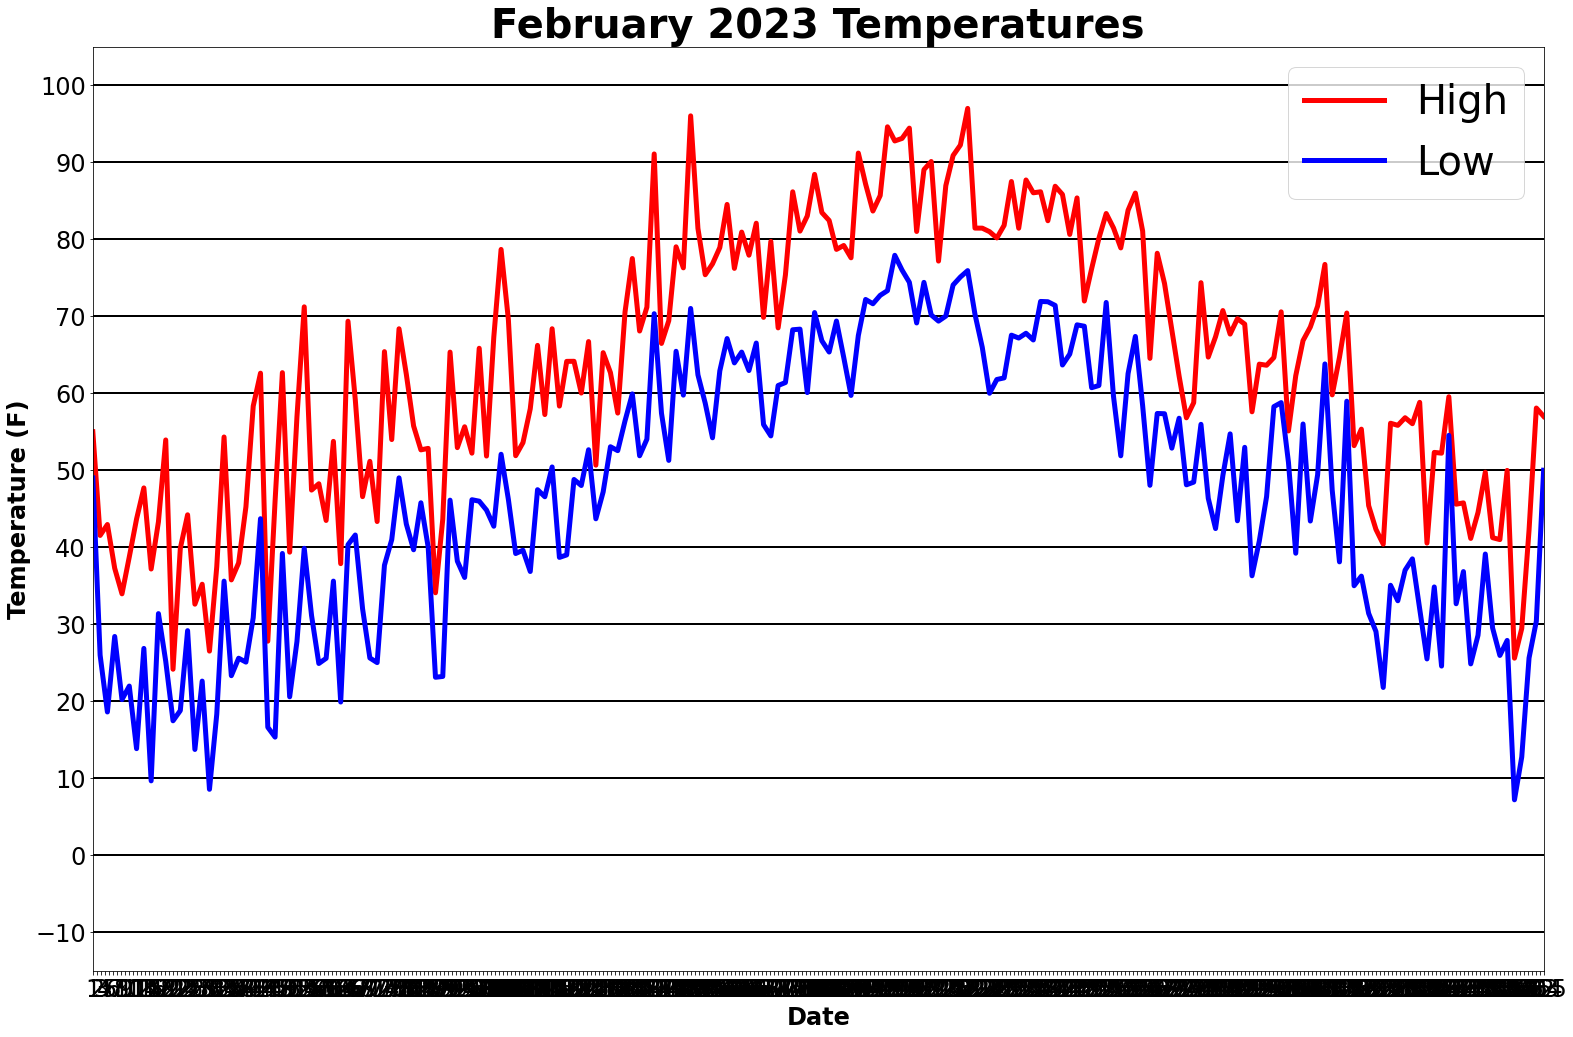

In [15]:
#
# Make some graphs - temperature line plots first
# For just one month
#

month_name = 'February'
addyear = '2023'
r = 365

path = '/Volumes/Elements/code/readexcel/'
span = 'three_month_temps.xlsx'
wxdata = f'{path}{span}'
#wxdata = f'{path}{month_name}_{addyear}.xlsx'
getWXdata = pd.read_excel(wxdata)
#getWXdata = getWXdata.drop((r), axis=0)   
print(getWXdata)

   
HI = getWXdata['High']
LO = getWXdata["Low"]
DATE = getWXdata["Date"]
   
y = HI.to_numpy()
y1 = LO.to_numpy()
x = DATE.to_numpy()
print(x)

#define x as 200 equally spaced values between the min and max of original x 
xnew = np.linspace(x.min(), x.max(), 200) 

#define spline
HIspl = make_interp_spline(x, y, k=2)
y_smooth = HIspl(xnew)
LOspl = make_interp_spline(x, y1, k=2)
y1_smooth = LOspl(xnew)

#Plot the results in matplotlib

plt.figure(figsize= (26, 17))
plt.locator_params(axis='x', nbins= r)
plt.xlim(1, r)
plt.ylim(-15, 105)
plt.xticks(fontsize=24)
plt.xlabel('Date', fontsize=24, fontweight ='bold')
plt.yticks(fontsize=24)
plt.ylabel('Temperature (F)', fontsize=24, fontweight ='bold')
plt.locator_params(axis='y', nbins=20)
plt.title(f'{month_name} {addyear} Temperatures', fontsize=40, fontweight ='bold')
plt.grid(axis = "y", linewidth = 2.0, color = 'black')
plt.plot(xnew,y_smooth,color = "red", linewidth =5, label ="High")
plt.plot(xnew,y1_smooth,color = "blue", linewidth =5, label ="Low")
plt.legend(fontsize=40)
plt.savefig(f'{path}{month_name}temps_{addyear}')


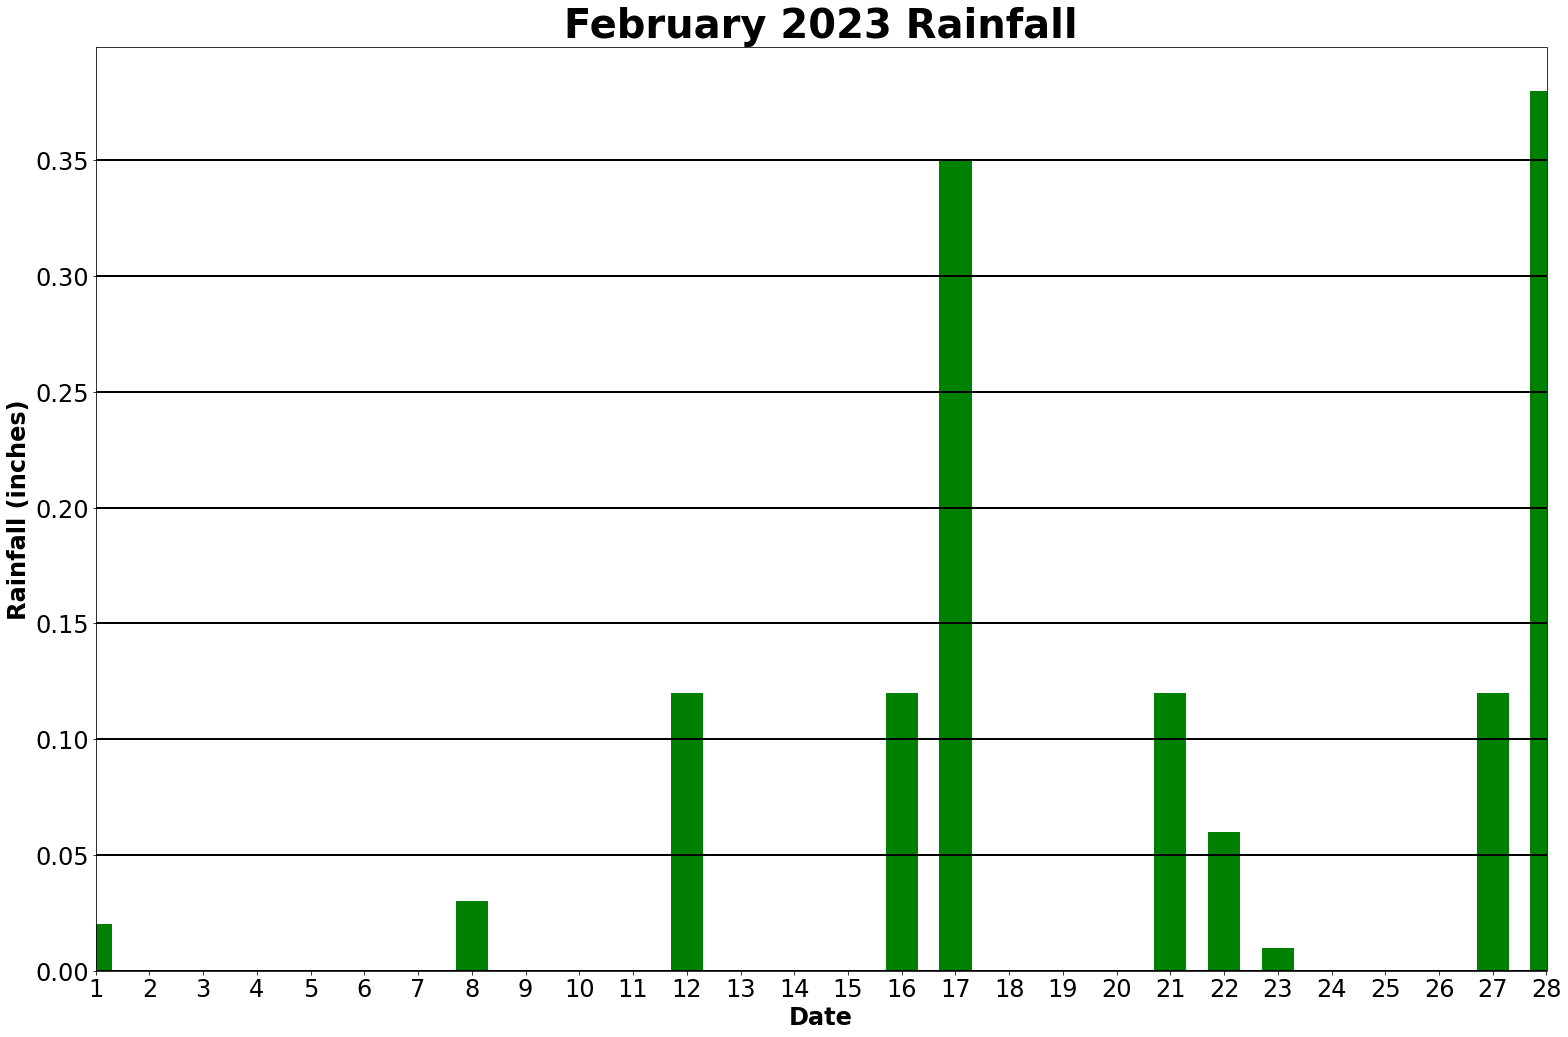

In [13]:
#
# make some graphs - now some rainfall bar plot
# For just one month
#

month_name = 'February'
addyear = '2023'
r = 28


    #Set up data
path = '/Volumes/Elements/code/readexcel/'
wxdata = f'{path}{month_name}_{addyear}.xlsx'
getWXdata = pd.read_excel(wxdata)
getWXdata = getWXdata.drop((r), axis=0)      
    
#Plot the results in matplotlib
plt.figure(figsize=(26, 17))
plt.grid(axis = "y", linewidth = 2.0, color = 'black')
plt.locator_params(axis='x', nbins= r)
plt.xlim(1, r)
plt.xticks(fontsize=24)
plt.xlabel('Date', fontsize=24, fontweight ='bold')
plt.yticks(fontsize=24)
plt.ylabel('Rainfall (inches)', fontsize=24, fontweight ='bold')
plt.locator_params(axis='y', nbins=10)
plt.title(f'{month_name} {addyear} Rainfall', fontsize=40, fontweight ='bold')
plt.bar(getWXdata["Date"],getWXdata["Rainfall"], color = "green", width= 0.6)
plt.savefig(f'{path}{month_name}rainfall_{addyear}') 